In [1]:
import numpy as np
import pandas as pd
import cv2
import os 
import fnmatch

In [2]:
#Reading data lab tested data in csv
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\Lab_tested_data.csv')
#Placing sample id in the blank column because for both inner and outer sample is same 
Lab_tested_data = Lab_tested_data.fillna(method='ffill')
Lab_tested_data.to_csv("Pre_processed_lab_tested_data.csv")

In [39]:
#Getting sample id for images and EC values against each image
Sample_ID = Lab_tested_data.iloc[:,0]
OM_Value = Lab_tested_data.iloc[:,3]
OM_Value = pd.to_numeric(EC_Value,errors='coerce')

In [40]:
def load_images_from_folder(folder):
    Labels = []
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        img = img[800:1100,800:1100] #Resizing the image
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id]) #checking image sample id exist in the lab results or not
        Result = Sample_ID[Result];
        if len(Result) >= 1:
            #Checking that if result greater than one means that sample id have two images
            if len(Result) > 1:  
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                Id_2_index = Result[1]
                print(id)
                #Taking average both inner and outer surface soil results 
                Labels.append([filename,img,(EC_Value[Id_1_index]+EC_Value[Id_2_index])/2])
            #Checking if there is only one image
            else:
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                print(id)
                Labels.append([filename,img,(EC_Value[Id_1_index])])
        else:
            continue
    return Labels

In [41]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\testing_data')

110638.0
110638.0
110639.0
110639.0
110640.0
110640.0
110641.0
110641.0
110642.0
110642.0
110643.0
110643.0
110644.0
110644.0
110645.0
110645.0
110646.0
110646.0
110648.0
110648.0
110649.0
110649.0
110650.0
110650.0
110651.0
110651.0
110652.0
110652.0
110653.0
110653.0
110654.0
110654.0
110655.0
110655.0
110656.0
110656.0
110657.0
110657.0
110658.0
110658.0
110659.0
110659.0
110660.0
110660.0
110661.0
110661.0
110662.0
110662.0
110663.0
110663.0
110664.0
110664.0
110665.0
110665.0
110667.0
110667.0
110734.0
110734.0
110735.0
110735.0
110736.0
110736.0
110737.0
110737.0
110738.0
110738.0
110740.0
110740.0
110745.0
110745.0
110746.0
110746.0
110747.0
110747.0
110749.0
110749.0
110750.0
110750.0
110752.0
110752.0
110753.0
110753.0
110755.0
110755.0
110756.0
110756.0
110757.0
110757.0
110759.0
110759.0
110760.0
110760.0
110761.0
110761.0
110762.0
110762.0
110763.0
110763.0
110766.0
110766.0
110767.0
110767.0
110768.0
110768.0
110773.0
110773.0
110775.0
110775.0
110776.0
110776.0
110777.0
1

In [43]:
pH_index = []
for data in dataset:
    image = data[1]
    # extracting blue,red,green channel from color image
    blue_channel = image[:,:,0]
    green_channel = image[:,:,1]
    red_channel = image[:,:,2]
    temp = (np.average(red_channel)/np.average(green_channel))/np.average(blue_channel)
    temp = np.nanmean(temp)
    print(temp)
    pH_index.append([temp,data[2]])

0.0071883555514169264
0.006287612973476058
0.006415654165858761
0.006435919091663637
0.007480999878133972
0.006795326890498952
0.02184120480601717
0.006916345413492793
0.007585677707235572
0.006779664793863944
0.006678010649303315
0.007760072708918694
0.006524250269186531
0.006024613420558852
0.006576537552236412
0.007207910128005539
0.006608096582830504
0.006211218262028392
0.008246100852809272
0.008639474727887718
0.005972959726305461
0.005625218411702411
0.007524127001464687
0.005605607048133788
0.006009143586915436
0.00643370894707071
0.00570194822909538
0.00625071828681749
0.006738663443649984
0.0067706942969716025
0.006816717821479557
0.006283573351878246
0.008517215047880996
0.005946715532417044
0.006574846764044272
0.006564361183629664
0.006586469174389697
0.006222851214539006
0.006469569699084523
0.0061855568605472195
0.006456614784964599
0.005694054414810186
0.005718644954699868
0.007801860925527108
0.006526181859209354
0.005953577493121585
0.006123913482542004
0.005748814205

0.005783471034379954
0.006135900160651006
0.006378972927140524
0.005992934562922879
0.008623738558156745
0.007060478902048252
0.00802228646137496
0.008033137494718373
0.0054943233463496865
0.006345021996677047
0.0056344657383421435
0.005668852615716796
0.006626297057239538
0.008366809540936628
0.007211576441235218
0.006078536499483333
0.006707126249594449
0.0064802784716405755
0.008134743405759912
0.007512975483795609
0.006514363164012259
0.006751592549752655
0.006199878706297575
0.007442693000145825
0.0071539608406130245
0.00784328805047133
0.006214961799731655
0.007526346334836786
0.005892134624273085
0.008770875516107165
0.00844819787690605
0.012620441383773275
0.018667863363989394
0.015680416873348587
0.007164088744588186
0.006000087290560725
0.005900439018275808
0.011982166997601254
0.005655853705192672
0.005057712286145829
0.006146673826911195
0.0075992147517077585
0.006039360361767078
0.00661364678051856
0.006320315413247157
0.006782230409533954
0.0061339239612145015
0.006474219

In [44]:
data1 = pd.DataFrame(pH_index,columns=['pH_Index','EC_Value'])

In [45]:
data1.to_csv("pH_Index_with_EC_value.csv")

print(data1)

     pH_Index  OM_Value
0    0.007188     0.565
1    0.006288     0.565
2    0.006416     0.585
3    0.006436     0.585
4    0.007481     1.095
..        ...       ...
696  0.009333     0.910
697  0.008495     0.930
698  0.021612     0.930
699  0.014158     0.525
700  0.016133     0.525

[701 rows x 2 columns]


In [46]:
pH_index = data1.iloc[:,0]
print(pH_index)

0      0.007188
1      0.006288
2      0.006416
3      0.006436
4      0.007481
         ...   
696    0.009333
697    0.008495
698    0.021612
699    0.014158
700    0.016133
Name: pH_Index, Length: 701, dtype: float64


In [47]:
EC_value = data1.iloc[:,1]
print(EC_value)

0      0.565
1      0.565
2      0.585
3      0.585
4      1.095
       ...  
696    0.910
697    0.930
698    0.930
699    0.525
700    0.525
Name: OM_Value, Length: 701, dtype: float64


In [48]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
seed(1)
import pandas as pd
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [49]:
#Output variable or Tested
y1 = np.array(EC_value)

In [50]:
#Input featuree
x1 = np.array(pH_index)

In [51]:
X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [52]:
model = Sequential()

#Input layer
model.add(Dense(128, kernel_initializer='normal',input_dim = 1, activation='relu'))

#Hidden layers
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

#Output layer
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

#Network compilation
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 165,121
Trainable params: 165,121
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=100, batch_size=150, verbose=1, validation_split=0.2)
predictions = model.predict(X_val)

Epoch 1/100
3/3 [==============================] - 0s 65ms/step - loss: 1.2131 - mse: 1.2131 - mae: 1.0005 - val_loss: 1.1064 - val_mse: 1.1064 - val_mae: 0.9337
Epoch 2/100
3/3 [==============================] - 0s 31ms/step - loss: 1.1539 - mse: 1.1539 - mae: 0.9706 - val_loss: 1.0285 - val_mse: 1.0285 - val_mae: 0.8910
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.0600 - mse: 1.0600 - mae: 0.9201 - val_loss: 0.9064 - val_mse: 0.9064 - val_mae: 0.8196
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.9125 - mse: 0.9125 - mae: 0.8358 - val_loss: 0.7255 - val_mse: 0.7255 - val_mae: 0.7014
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6970 - mse: 0.6970 - mae: 0.7032 - val_loss: 0.4904 - val_mse: 0.4904 - val_mae: 0.5458
Epoch 6/100
3/3 [==============================] - 0s 11ms/step - loss: 0.4286 - mse: 0.4286 - mae: 0.5224 - val_loss: 0.2722 - val_mse: 0.2722 - val_mae: 0.3900
Epoch 7/100
3/3 [===========

3/3 [==============================] - 0s 10ms/step - loss: 0.2123 - mse: 0.2123 - mae: 0.3100 - val_loss: 0.2367 - val_mse: 0.2367 - val_mae: 0.3477
Epoch 52/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2124 - mse: 0.2124 - mae: 0.3106 - val_loss: 0.2378 - val_mse: 0.2378 - val_mae: 0.3494
Epoch 53/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2123 - mse: 0.2123 - mae: 0.3106 - val_loss: 0.2374 - val_mse: 0.2374 - val_mae: 0.3487
Epoch 54/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2122 - mse: 0.2122 - mae: 0.3103 - val_loss: 0.2373 - val_mse: 0.2373 - val_mae: 0.3485
Epoch 55/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2123 - mse: 0.2123 - mae: 0.3103 - val_loss: 0.2372 - val_mse: 0.2372 - val_mae: 0.3484
Epoch 56/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2122 - mse: 0.2122 - mae: 0.3103 - val_loss: 0.2375 - val_mse: 0.2375 - val_mae: 0.3488
Epoch 57/100
3/3 [=================

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


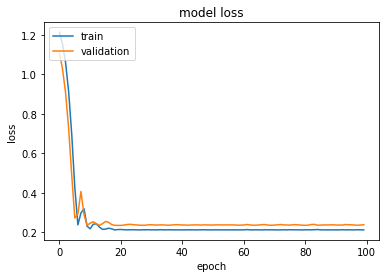

In [54]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

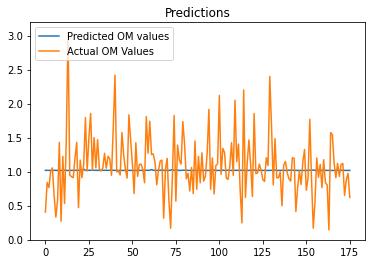

In [55]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted OM values', 'Actual Values'], loc='upper left')
plt.show()